In [38]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

**Instruções gerais:** Sua submissão <u>deve</u> conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" em um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'--- submetendo um <u>único pdf</u>.

# Trabalho de casa 04: Seleção de modelo e hiperparametros

**1.** O código abaixo carrega o banco de dados *California housing*. Divida o banco de dados em treino, teste e validação. Use o conjunto de validação para escolher o coeficiente de regularização $c$ para um modelo de regressão linear com penalização $L_2$. Use a fórmula analítica para estimar os pesos do modelo de regressão. Plote os MSE no conjunto de trieno e validação em função de $c$. Comente o resultado. Avalie a performance do modelo ótimo no conjunto de teste e também comente.

In [39]:
SEED = 42
np.random.seed(SEED)

X, y = fetch_california_housing(return_X_y=True)

In [40]:
# Seu código aqui#dividir o bancoo de dados em treino, teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Dividir o banco de dados de treino em treino e validação.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)


# linear regression with L2 penalty
class regressao_linear:
    def __init__(self, c=0.1):
        self.c = c;
        self.w = None;
        self.ws = [];

    def fit(self, X, y):
        n, d = X.shape;
        self.w = np.linalg.inv(X.T @ X + self.c * np.eye(d)) @ X.T @ y;
        self.ws.append(self.w);

    def predict(self, X):
        return X @ self.w;


mse: 0.5906832867541769
mse: 0.5906832890191026
mse: 0.5906832958088609
mse: 0.5906833071159323
mse: 0.5906833229328101
mse: 0.590683343252
mse: 0.5906833680660203
mse: 0.5906833973674013
mse: 0.5906834311486864
mse: 0.5906834694024308
mse: 0.5906835121212024
mse: 0.5906841832591321
mse: 0.5906852928153606
mse: 0.5906868335583082
mse: 0.5906887983752116
mse: 0.5906911802699646
mse: 0.5906939723609987
mse: 0.5906971678792092
mse: 0.5907007601659219
mse: 0.5907047426709051


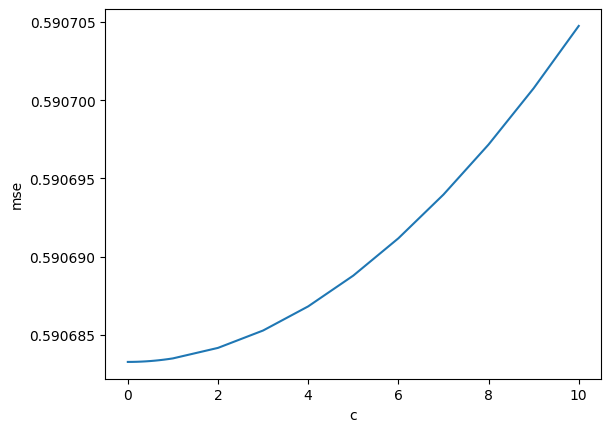

In [41]:
#lista de valores de c
cs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2,3,4, 5,6,7,8,9,10];
mse_values = []

#treinar modelo pra esses valores de c
for c in cs:
    model = regressao_linear(c=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    # compute mse
    mse_values.append(np.mean((y_pred - y_train) ** 2))
    print(f"mse: {mse_values[-1]}")

#plotar mse pra cada c
import matplotlib.pyplot as plt
plt.plot(cs, mse_values);
plt.xlabel("c");
plt.ylabel("mse");
# plt.xscale("log");
# plt.yscale("log");
plt.show();

Note que valores maiores de $c$ estão gerando valores maiores de mse - mesmo que esses valores sejam muito pouco maiores - o que nos leva a crer que $c=0$ é o melhor valor para o coeficiente de regularização.

In [42]:
#cheking ir norm of w is decresing as c increases
weight_norms = []
for c in cs:
    model = regressao_linear(c=c)
    model.fit(X_train, y_train)
    weight_norms.append(np.linalg.norm(model.w))
print(weight_norms)

[1.1288112910966632, 1.1285461886354498, 1.128281244264644, 1.1280164578523255, 1.127751829265545, 1.1274873583688931, 1.1272230450323766, 1.126958889122916, 1.1266948905072154, 1.126431049053433, 1.1261673646295383, 1.123539128060965, 1.1209264502022516, 1.1183292013024624, 1.1157472530333927, 1.113180478466986, 1.1106287520582412, 1.108091949625936, 1.1055699483343542, 1.1030626266731558]


Vamos agora avaliar o mse pro conjunto de validação.

mse: 0.6363351874515026
mse: 0.6363353285571307
mse: 0.6363354742925442
mse: 0.6363356246498689
mse: 0.6363357796212192
mse: 0.6363359391987344
mse: 0.6363361033745597
mse: 0.6363362721408565
mse: 0.6363364454898219
mse: 0.636336623413583
mse: 0.6363368059044048
mse: 0.6363388802931866
mse: 0.6363414029030852
mse: 0.6363443661472907
mse: 0.6363477625648822
mse: 0.6363515848183467
mse: 0.6363558256913898
mse: 0.6363604780866478
mse: 0.636365535023622
mse: 0.6363709896365627


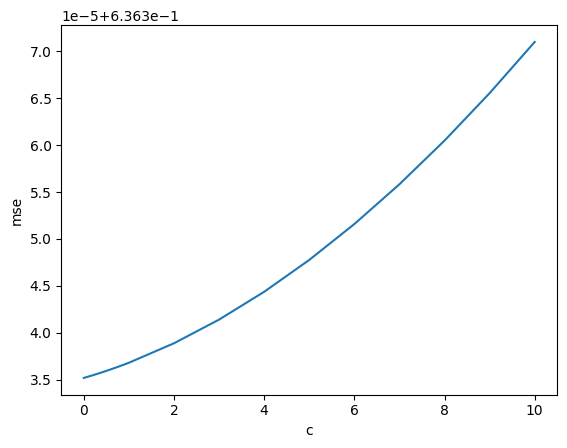

In [43]:
mse_values = []
for c in cs:
    model = regressao_linear(c=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    # compute mse
    mse_values.append(np.mean((y_pred - y_val) ** 2))
    print(f"mse: {mse_values[-1]}")

#plotar mse pra cada c
import matplotlib.pyplot as plt
plt.plot(cs, mse_values);
plt.xlabel("c");
plt.ylabel("mse");
# plt.xscale("log")
# plt.yscale("log")
plt.show();

Os resultados foram semelhantes. Agora, vamos calcular o mse para o melhor c no conjunto de teste.


In [44]:
#teste
model = regressao_linear(c=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"mse: {mse}")


mse: 0.6244859066365823



O deslize cometido é pequeno, mas ele nos dá uma boa pista de que, de fato, a escolha de usar c é bastante sensata. Pense bem, estamos lidando com um banco de dados consideravelmente grande. Nesse cenário, reduzir a variância não nos traz grandes vantagens, só estamos aumentando o viés sem realmente ganhar nada em troca. Então, aumentar o c realmente não parece ser uma ideia muito inteligente.

**2.** Implemente 5-fold *nested cross-validation* para escolher entre os métodos $k$-NN e regressão linear com regularização $L_2$ (similar ao exercício acima). Considere $k \in \{1, 2, 3, 4, 5\}$ e $c \in \{0, 1, 10, 100\}$. Use o mesmo banco de dados do último exercício e comente o resultado. Em média, qual valor de hiperparametro resulta na melhor performance para o método escolhido (use 5-fold cross validation regular para isso)?

Obs.: para simplificar sua vida, use o $k$-NN para regressão do scikit-learning com distância euclidiana.

Obs. 2: para mais informações sobre o $K$-fold *nested cross-validation*, recomendamos esses materiais:
- [Algoritmo e breve explicação](https://weina.me/nested-cross-validation): a autora apresenta uma boa explicação do assunto acompanhada de uma descrição do algoritmo;
- [Ilustrações e explicação acompanhada de código](https://ploomber.io/blog/nested-cv/): ajuda a visualizar melhor o que é *nested cross-validation*; vale lembrar que seu código, diferente do dos exemplos desse link, não deve utilizar scikit-learn para implementar a *cross-validation*. 

In [45]:
# get sklearn from sklearn
from sklearn.neighbors import KNeighborsRegressor

#lista de valores de c e k
cs = [0, 1,10,100];
ks = [2, 3, 4, 5]
c = 1
k = 1
modelos = [KNeighborsRegressor(n_neighbors=k), regressao_linear(c=c)]


In [46]:
#function to check the performance of the models
def check_model(X_train, y_train, X_val, y_val, mse, knn_mse):
    modelos = ['linear', 'knn']

    for model in modelos:
        if model == 'linear':
            for c in cs:
                model = regressao_linear(c=c)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)
                mse.append(np.mean((y_pred - y_val) ** 2))
        else:
            model = KNeighborsRegressor(n_neighbors=k)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            knn_mse.append(np.mean((y_pred - y_val) ** 2))

    return mse, knn_mse

Agora vamos implementar o 5-fold nested cross-validation usando a função acima pra calcular o MSE de cada k e c

In [47]:
#nested cross validation to get the best model and hyperparameters

indeces = [0, X.shape[0]//5, X.shape[0]//5*2, X.shape[0]//5*3, X.shape[0]//5*4, X.shape[0]]
contador = 0

linear_mse = [0,0,0,0]
knn_mse = [0,0,0,0,0]

for i in indeces:
    if i == X.shape[0]:
        break
    else:
        i_2 = indeces[contador+1]

        X_test = X[i:i_2]
        y_test = y[i:i_2]
        X_train = np.concatenate((X[:i], X[i_2:]))
        y_train = np.concatenate((y[:i], y[i_2:]))
        contador += 1

        indeces_2 = [0, X_train.shape[0]//5, X_train.shape[0]//5*2, X_train.shape[0]//5*3, X_train.shape[0]//5*4, X_train.shape[0]]
        contador_2 = 0
        for j in indeces_2:
            if j == X_train.shape[0]:
                break
            else:
                j_2 = indeces_2[contador_2+1]

                X_val = X_train[j:j_2]
                y_val = y_train[j:j_2]
                X_train_2 = np.concatenate((X_train[:j], X_train[j_2:]))
                y_train_2 = np.concatenate((y_train[:j], y_train[j_2:]))
                contador_2 += 1

                linear_mse, knn_mse = check_model(X_train_2, y_train_2, X_val, y_val, linear_mse, knn_mse)

Daí calculamos o melhor método com o melhor hiperparâmetro para cada método, calculando a média dos MSEs e pegando o menor.

In [48]:
#get mean of mse
linear_mse = [mse/5 for mse in linear_mse]
knn_mse = [mse/5 for mse in knn_mse]

#concatenate
mse = linear_mse + knn_mse

melhor_par = None
melhor_mse = None

#melhor parametro
for i, mse in enumerate(mse):
    if melhor_mse is None or mse< melhor_mse:
        melhor_mse = mse
        if i < 4:
            melhor_par = cs[i]
            melhor_metodo = 'Regressão Linear'
        else:
            melhor_par = ks[i-4]
            melhor_metodo = 'KNN'

print(f"Melhor método: {melhor_metodo}")
print(f"Melhor parâmetro: {melhor_par}")


Melhor método: Regressão Linear
Melhor parâmetro: 0


Como esperado pelo desenvolvimento anterior, o melhor método foi a regressão linear com c=0.

# Exercício de "papel e caneta"

**1.** Nas nota de aula, derivamos o "dilema viés-variância" calculando o MSE esperado entre a função alvo de aprendizado $f$ e a predição do nosso modelo $h_{\mathcal{D}}$:

$$
\mathbb{E}_{x, \mathcal{D}} 
    \left[ 
        \left( 
        h_{\mathcal{D}}(x) - f\left(x\right) 
        \right)^2
    \right] =
\mathbb{E}_{x}[\underbrace{\textrm{Var}_{\mathcal{D}}[
        h_{\mathcal{D}}(x)]}_{\text{ Variância} }] + \mathbb{E}_{x} [ (\underbrace{\mathbb{E}_{\mathcal{D}}[
        h_{\mathcal{D}}(x) - f\left(x\right)]  }_{\text{Viés}})^2] 
    ].
$$

Com isso em mente, adapte nossa derivação para o caso em que as respostas de teste $f(x)$ são corrompidas por um ruído aditivo aleatório $\epsilon$ com média zero, i.e., observamos $f^\prime(x) = f(x) + \epsilon$. Mais concretamente, trabalhe a seguinte esperança para derivar uma decomposição similar à da nota de aula:
$$
\mathbb{E}_{x, \epsilon, \mathcal{D}} 
    \left[
        \left( 
        h_{\mathcal{D}}(x) - f^\prime\left(x\right)
        \right)^2
    \right].
$$

Compare a diferença entre a decomposição que você obteve e a da nota de aula.

Dica: sua decomposição deve se diferenciar da acima em apenas um termo aditivo, que envolve uma esperança sobre $x$ e $y$.


**Resposta**
Substituindo $f(x)$ no primeiro termo da equação do enunciado por $f(x) + \epsilon$ temos
$$
\mathbb{E}_{x, \epsilon, \mathcal{D}} \left[ \left( 
        h_{\mathcal{D}}(x) - \left(f\left(x\right)  + \epsilon\right)
        \right)^2 \right]
$$

 


$$
\mathbb{E}_{x, \epsilon, \mathcal{D}} \left[ ( 
        h_{\mathcal{D}}(x))^2 - 2(h_{\mathcal{D}}(x))(f(x)  + \epsilon)
 + (\epsilon)^2 \right]
$$

Vamos somar 
$$
\mathbb{E}_{x, \epsilon} \left[
    \mathbb{E}_{\mathcal{D}}\left[h_{\mathcal{D}}(x)\right]^2\right] - 
    \mathbb{E}_{x, \epsilon} \left[
    \mathbb{E}_{\mathcal{D}}\left[h_{\mathcal{D}}(x)\right]^2\right]
$$
à expressão e coletar o termo equivalente à variância.



$$
\mathbb{E}_{x, \epsilon, \mathcal{D}} \left[ ( 
        h_{\mathcal{D}}(x))^2 - 2(h_{\mathcal{D}}(x))(f(x)  + \epsilon)
 + (\epsilon)^2 \right] 
 + 
 \mathbb{E}_{x, \epsilon} \left[
    \mathbb{E}_{\mathcal{D}}\left[h_{\mathcal{D}}(x)\right]^2\right] - 
    \mathbb{E}_{x, \epsilon} \left[
    \mathbb{E}_{\mathcal{D}}\left[h_{\mathcal{D}}(x)\right]^2\right]
$$

Agrupando o primeiro e o ultimo termo temos a variância
$$\left(
\mathbb{E}_{x, \epsilon, \mathcal{D}} \left[ ( 
        h_{\mathcal{D}}(x))^2\right] -
            \mathbb{E}_{x, \epsilon} \left[
    \mathbb{E}_{\mathcal{D}}\left[h_{\mathcal{D}}(x)\right]^2\right]
    \right)+
        \mathbb{E}_{x, \epsilon, \mathcal{D}} \left[  - 2(h_{\mathcal{D}}(x))(f(x)  + \epsilon)
 + (\epsilon)^2 \right] 
 + 
 \mathbb{E}_{x, \epsilon} \left[
    \mathbb{E}_{\mathcal{D}}\left[h_{\mathcal{D}}(x)\right]^2\right] 
    $$


$$
\mathbb{E}_{x}var_{\mathcal{D}}[h_{\mathcal{D}}(x)]+
        \mathbb{E}_{x, \epsilon, \mathcal{D}} \left[  - 2(h_{\mathcal{D}}(x))(f(x)  + \epsilon)
 + (\epsilon)^2 \right] 
 + 
 \mathbb{E}_{x, \epsilon} \left[
    \mathbb{E}_{\mathcal{D}}\left[h_{\mathcal{D}}(x)\right]^2\right] 

O restante da expressão - que não a experança - vamos manipular até atingir o viés
$$
\mathbb{E}_{x, \epsilon} [
    \mathbb{E}_D[h_{D}(x)]^2- 2\mathbb{E}_{D}[h_D(x)(f(x) + \epsilon)] + (f(x) + \epsilon)^2]
$$



$$
\mathbb{E}_{x, \epsilon} [
    \mathbb{E}_D[h_{D}(x)]^2- 2\mathbb{E}_{D}[h_D(x)(f(x)) + h_D(x)\epsilon] + (f(x)^2 + 2f(x)\epsilon + \epsilon^2)]
    $$

$$
\mathbb{E}_{x,\epsilon}[(\mathbb{E}_D[h_D(x)] - f(x))^2] + 
\mathbb{E}_{x,\epsilon,D}[2f(x)\epsilon - 2h_D(x)\epsilon + \epsilon^2]$$

Aplicando o valor esperado em $\epsilon$ devidamente temos 

$$
\mathbb{E}_{x}[(\mathbb{E}_D[h_D(x)] - f(x))^2] + 
\mathbb{E}_{x,D}[2f(x)\mathbb{E}_{\epsilon}[\epsilon] - 2h_D(x)\mathbb{E}_{\epsilon}[\epsilon] + \mathbb{E}_{\epsilon}[\epsilon^2]]
$$

Agora, tendo como premissa que $\epsilon$ possui média zero, temos que $\mathbb{E}_{\epsilon}[\epsilon] = 0$, podemos cancelar os termos em que esse componente aparece. Como a variância é a esperança do quadrado menos o quadrado da esperança, temos que $\mathbb{E}_{\epsilon}[\epsilon^2] = \sigma^2$, onde $\sigma^2$ é a variância do ruído. Assim, temos que a  expressão se manifesta por

$$
\mathbb{E}_{x}[(\mathbb{E}_D[h_D(x)] - f(x))^2] + 
\mathbb{E}_{x,D}[\mathbb{E}_{\epsilon}[\epsilon^2]]
$$

$$
\mathbb{E}_{x}[(\mathbb{E}_D[h_D(x)] - f(x))^2] + 
var_{\epsilon}(\epsilon)
$$

Como conclusão, temos que a substituição de $f(x)$ por $f(x) + \epsilon$ resulta em uma decomposição do erro esperado que inclui um termo adicional, a variância do ruído. O resultado final é

$$
\mathbb{E}_{x,\epsilon, \mathcal{D}} 
    \left[ 
        \left( 
        h_{\mathcal{D}}(x) - f'\left(x\right) 
        \right)^2
    \right]=
\mathbb{E}_{x}[\underbrace{\textrm{Var}_{\mathcal{D}}[
        h_{\mathcal{D}}(x)]}_{\text{ Variância} }] + \mathbb{E}_{x} [ (\underbrace{\mathbb{E}_{\mathcal{D}}[
        h_{\mathcal{D}}(x) - f\left(x\right)]  }_{\text{Viés}})^2] 
     + var_{\epsilon}(\epsilon)
$$